Total points for this HW: 100.
Due date: 02/20/2020 (at the start of class)

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10 pts)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)

For example, relevant department want to decide if it is necessary to assign policemen to manage the traffic jam, they can use the sensor data to get if it is a traffic jam and does it necessary to assign people. They need data like how many vehicles are there in the traffic jam, what is the average time of a single vehicle in the traffic jam and on what case the assignment can be efficient. 

In this case, the officer needs to know which place might have a traffic jam. And people care about the features of the traffic jam, the officer needs to understand features to make decisions. It might be better to use the decision tree, cause the nodes of this decision tree can be clear. Plus, for specific areas at the same time, the data they can get is not too much.  

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

For instance, if we want to predict the housing price in the city. We care about if the prediction can be accurate, and the specific features of the housing is not that important. We just need to input the information of the housing we are interested in and predict the price. There might be a lot of features that can decide the pricing, like the location, built year, building class at the time of sale, sale date, residential and commercial units, land square feet and gross square feet, etc. If we use the single decision tree, it might be inaccurate as there are so many necessary nodes. With the random forest, even we don't know the structure of the model, we can have an accurate result.

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)

We can use LIME to get the interpretability out of the model by post-processing. I got the idea from http://sameersingh.org/files/papers/lime-kdd16.pdf. The doc can be found at https://lime-ml.readthedocs.io/en/latest/lime.html

First, use our trasining model. The model (denoted as ff) can be any model such as LR, NN, Wide and deep, C4.5 Decision tree, Random forest, GBDT. After training, we need to parse the model. First select a sample to be parsed. The sample can be calculated by the model to obtain a prediction (including the predicted label and the probability of 1). At this time, we select a new sample near this sample and use it. The model calculates multiple predictions so that the samples combine the new sample set. Then use the new resolvable features and predictions as labels to train a new simple model (such as LR), and then use the weight of the simple model as the importance of these features as the output.

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes.  (30 points)

In [1]:
import pandas as pd
import numpy as np
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
    thefile = StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2 pts)

In [2]:
df['MPG'].value_counts().head(1)

bad    15
Name: MPG, dtype: int64

In [3]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts)

In [4]:
# print a table to show the relevent information and get the information gain of each split

In [5]:
def cylinders_split_info_gain(df):
    print('{:8} {:4} {:4} {:4} {:4} {}'.format('cylinders', 'Good Y','Bad Y','Good N','Bad N', 'Info Gain'))
    
    for i in df['cylinders'].unique():
        goodY = len(df[(df['cylinders']==i) & (df['MPG']=='good')])
        badY = len(df[(df['cylinders']==i) & (df['MPG']=='bad')])
        goodN = len(df[(df['cylinders']!=i) & (df['MPG']=='good')])
        badN = len(df[(df['cylinders']!=i) & (df[ 'MPG']=='bad')]) 
        ig = InformationGain(goodY,badY,goodN,badN)
        print('{:8} {:^5} {:^6} {:^4} {:^8} {:.9f}'.format(str(i), str(goodY),str(badY),str(goodN),str(badN),ig))

In [6]:
def weight_split_info_gain(df):
    print('{:8} {:4} {:4} {:4} {:4} {}'.format('weight', 'Good Y','Bad Y','Good N','Bad N', 'Info Gain'))
    
    for i in df['weight'].unique():
        goodY = len(df[(df['weight']==i) & (df['MPG']=='good')])
        badY = len(df[(df['weight']==i) & (df['MPG']=='bad')])
        goodN = len(df[(df['weight']!=i) & (df['MPG']=='good')])
        badN = len(df[(df['weight']!=i) & (df[ 'MPG']=='bad')]) 
        ig = InformationGain(goodY,badY,goodN,badN)
        print('{:8} {:^5} {:^6} {:^4} {:^8} {:.6f}'.format(str(i), str(goodY),str(badY),str(goodN),str(badN),ig))  

In [7]:
print (cylinders_split_info_gain(df))
print ()
print (weight_split_info_gain(df))

cylinders Good Y Bad Y Good N Bad N Info Gain
4          5     4     0      11    0.365293898
6          0     6     5      9     0.153077953
8          0     5     5      10    0.122556249
None

weight   Good Y Bad Y Good N Bad N Info Gain
light      3     3     2      12    0.097107
medium     2     6     3      9     0.000000
weighty    0     6     5      9     0.153078
None


c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [8]:
def HP_midpoint_split_info_gain(df):
    
    print('{:4} {:4} {:4} {:4} {:4} {:4} {}'.format('col', '>HP', 'Good Y','Bad Y','Good N','Bad N', 'Info Gain'))
    
    # get the midpoints of all the HP values
    hp = sorted(df['HP'].unique())
    midpoints = [np.mean((hp[i], hp[i+1])) for i in range(len(hp)-1)]

    # caculate the information gain and print
    for m in midpoints:
        goodY = len(df[(df['HP']>m) & (df['MPG']=='good')])
        badY = len(df[(df['HP']>m) & (df['MPG']=='bad')])
        goodN = len(df[(df['HP']<=m) & (df['MPG']=='good')])
        badN = len(df[(df['HP']<=m) & (df[ 'MPG']=='bad')])
        ig = InformationGain(goodY,badY,goodN,badN)
        print('{:4} {:5} {:^5} {:^6} {:^4} {:^8} {:.6f}'.format('hp', str(m), str(goodY),str(badY),str(goodN),str(badN),ig))

In [9]:
print (HP_midpoint_split_info_gain(df)) 

col  >HP  Good Y Bad Y Good N Bad N Info Gain
hp   70.0    4     15    1      0     0.105915
hp   78.0    3     15    2      0     0.226258
hp   83.0    2     15    3      0     0.367103
hp   87.0    2     14    3      1     0.214171
hp   89.5    1     14    4      1     0.365777
hp   91.0    1     13    4      2     0.275927
hp   92.5    0     13    5      2     0.509186
hp   93.5    0     12    5      3     0.429505
hp   94.5    0     11    5      4     0.365294
hp   97.5    0     8     5      7     0.223357
hp   105.0   0     6     5      9     0.153078
hp   124.5   0     5     5      10    0.122556
hp   142.0   0     4     5      11    0.094448
hp   157.5   0     3     5      12    0.068394
hp   172.5   0     2     5      13    0.044113
hp   182.5   0     1     5      14    0.021377
None


d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4 pts)

When we choose HP > 92.5 as a decision rule, the information gain is the largest (0.519086). So this can be the optimal binary split of the data. 

There are 13 badY and zero goodY in HP > 92.5 branch. This branch is clear. So those HP < 92.5 would require further partitioning as there are 5 goodN and 2badN.

e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6 pts)

In [10]:
sub925 = df[df['HP'] < 92.5]

In [11]:
print(cylinders_split_info_gain(sub925))
print()
print(weight_split_info_gain(sub925)) 
print()
print(HP_midpoint_split_info_gain(sub925))

cylinders Good Y Bad Y Good N Bad N Info Gain
4          5     0     0      2     0.863120569
6          0     2     5      0     0.863120569
None

weight   Good Y Bad Y Good N Bad N Info Gain
light      3     0     2      2     0.291692
medium     2     2     3      0     0.291692
None

col  >HP  Good Y Bad Y Good N Bad N Info Gain
hp   70.0    4     2     1      0     0.076010
hp   78.0    3     2     2      0     0.169584
hp   83.0    2     2     3      0     0.291692
hp   87.0    2     1     3      1     0.005978
hp   89.5    1     1     4      1     0.061743
hp   91.0    1     0     4      2     0.076010
None


In [12]:
# We can find the best information gain at cylinders = 4 and cylinders = 6, 
# There is a clear separation when cylinders = 4 or cylinders = 6
# so we can stop the split

f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4 pts)

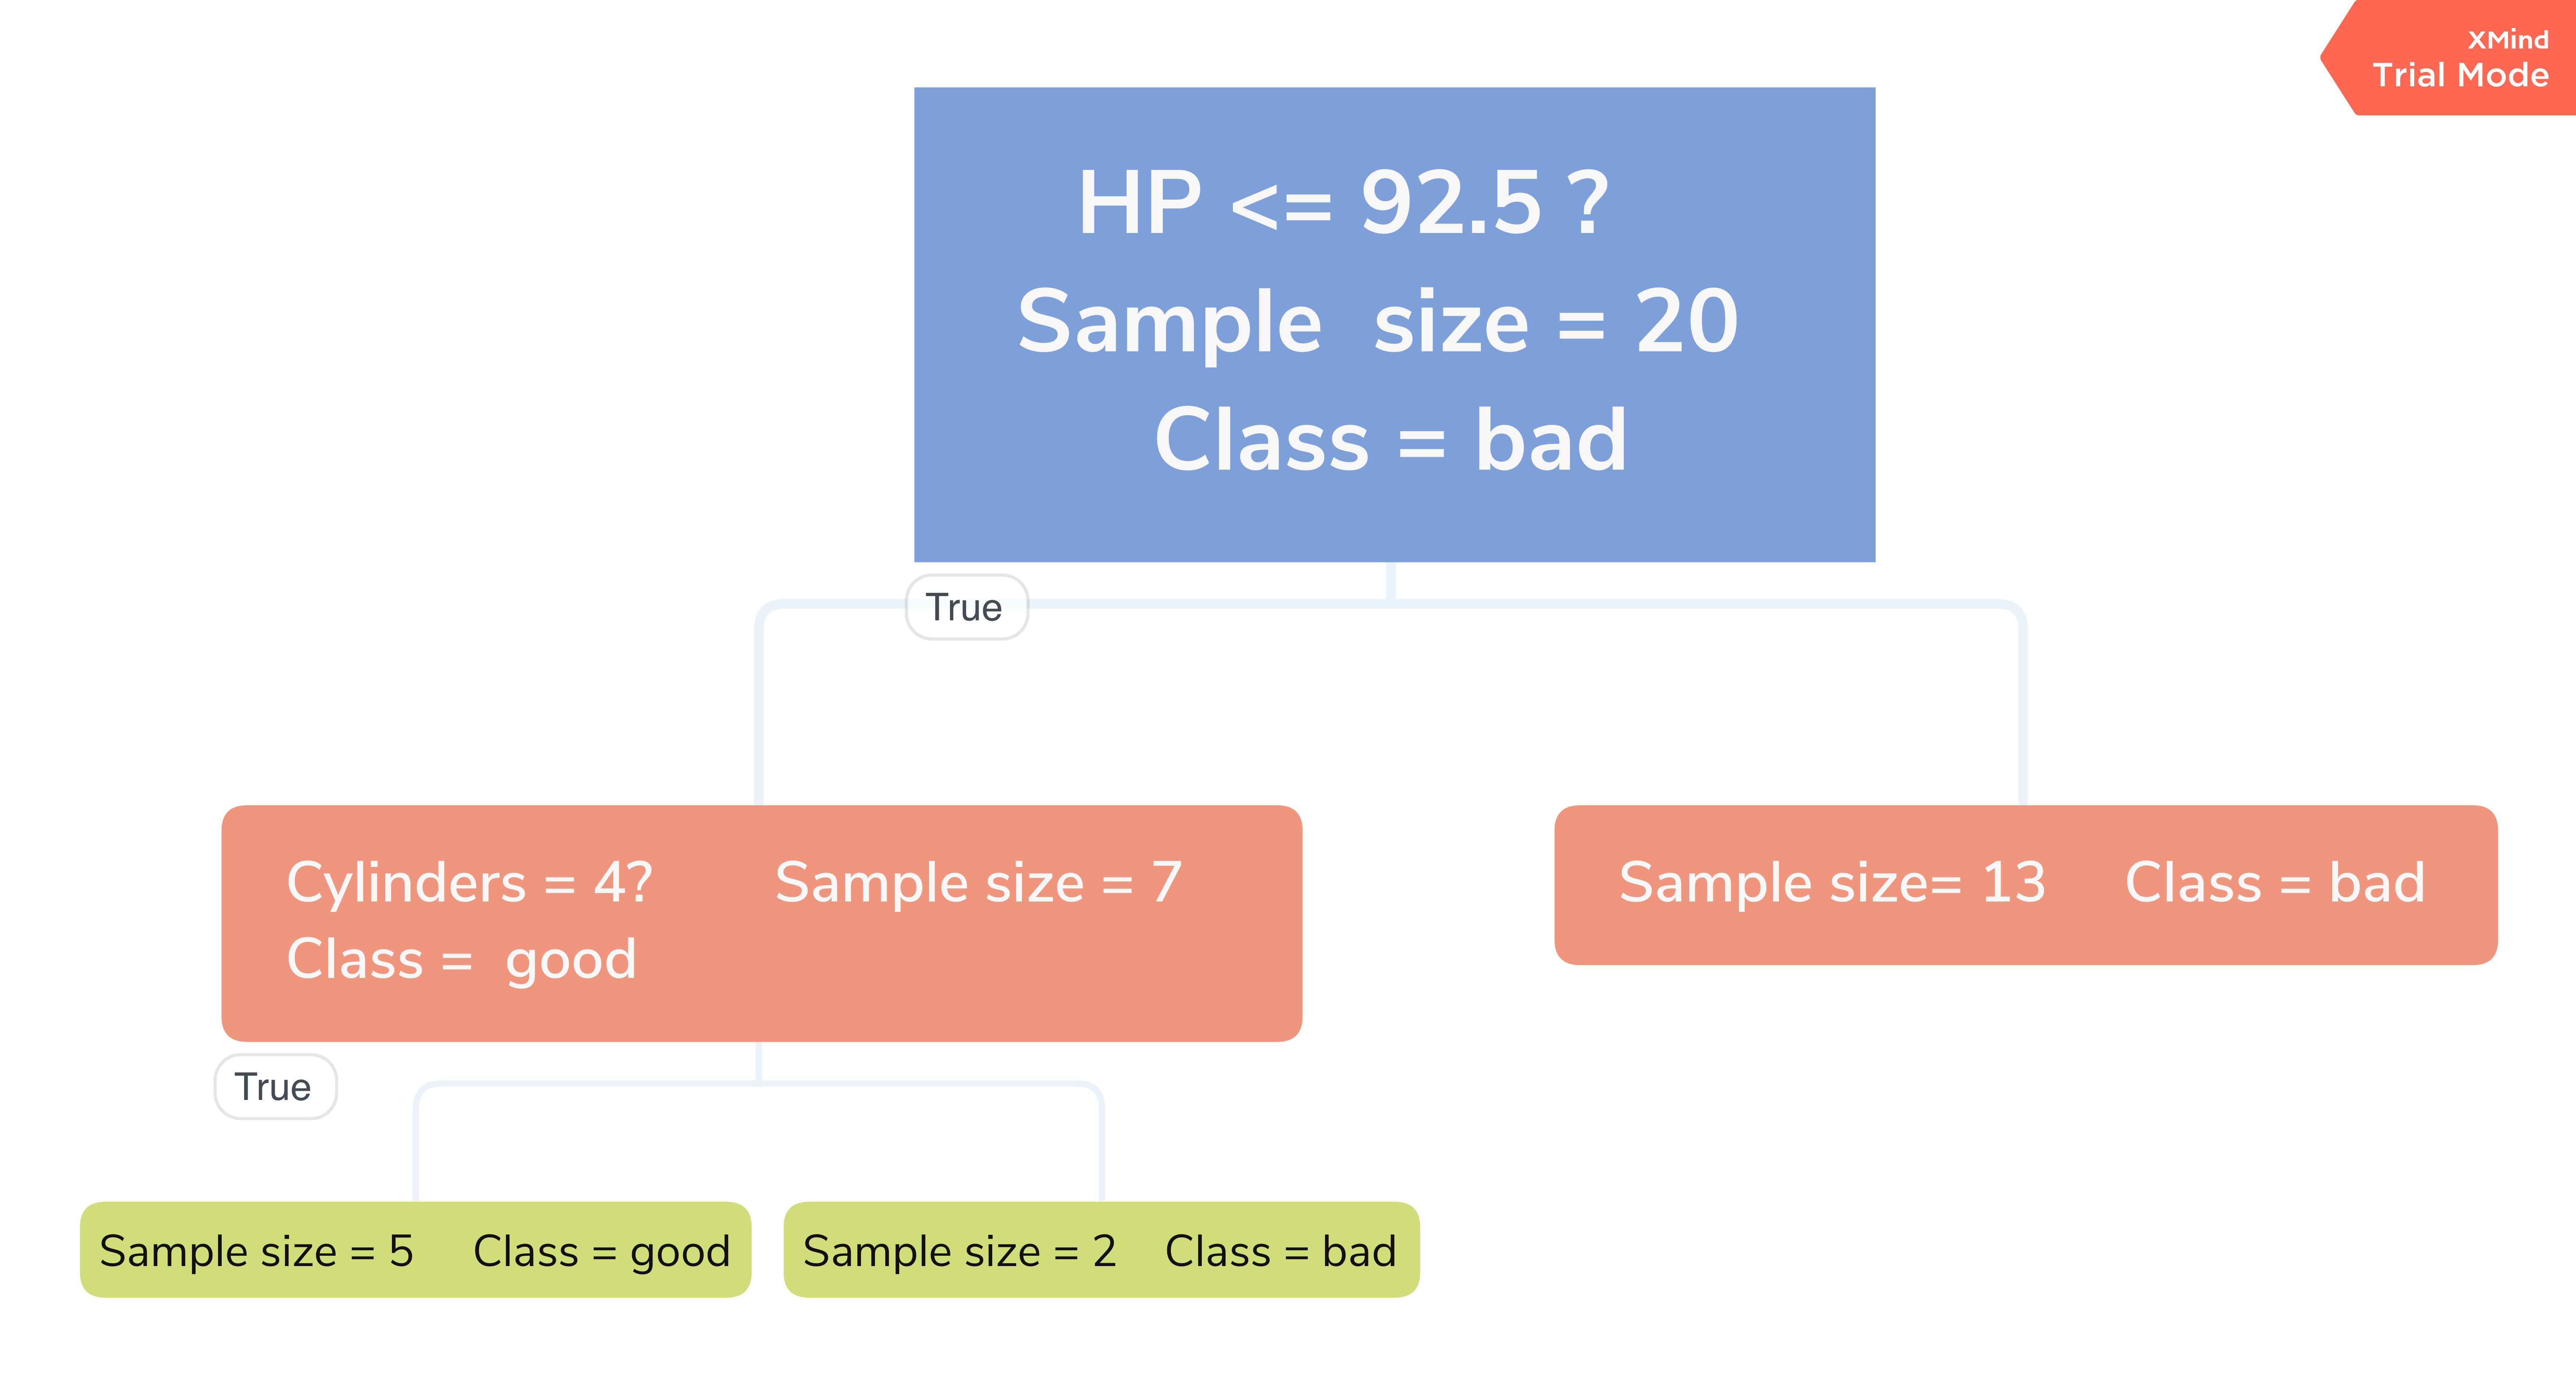

In [13]:
from IPython.display import Image
Image(filename = '/Users/chenjiesu/Desktop/1.0 ML assignments/HW1/HW1_decision_tree.png', width=1000, height=600)

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4 pts)

?,4,70,light

?,6,113,medium

?,6,83,weighty

?,4,95,weighty


In [14]:
# 1) HP = 70 < 92.5 --> cylinders = 4 --> class = good
# 2) HP = 113 > 92.5 --> class = bad
# 3) HP = 83 < 92.5 --> cylinders != 4 --> class= bad
# 4) HP =95 > 92.5 --> class= bad

#### good, 4, 70, light

#### bad, 6, 113, medium

#### bad, 6, 83, weighty

#### bad, 4, 95, weighty

### Question 3, Predicting burden of disease （40 pts)

In [15]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

#### BurdenOfDisease: 
Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10 pts)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [17]:
# train/test split
X = data.loc[:, 'FrxnPeaceIn10':'FemaleLtrcyRate']
y = data.loc[:, 'BurdenOfDisease']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3,random_state=999)

In [18]:
# choose a hyper-parameter
max_leaf_nodes = range(2,500,25)

In [19]:
# fit decision tree classifier(with different hyper-parameter, 
# print the correaponding classification accuracy
IS = []
OS = []

for i in max_leaf_nodes:
    dt = DecisionTreeClassifier(max_leaf_nodes=i)
    dt.fit(X_train, y_train)
    IS.append(dt.score(X_train,y_train))
    OS.append(dt.score(X_test,y_test))
    
    print('Max Leaf Nodes =', i)
    
    # in sample accuracy
    print ('In sample accuracy:',dt.score(X_train,y_train))

    # out of sample accuracy
    print ('Out of sample accuracy:',dt.score(X_test,y_test))
    print()

Max Leaf Nodes = 2
In sample accuracy: 0.5164835164835165
Out of sample accuracy: 0.3333333333333333

Max Leaf Nodes = 27
In sample accuracy: 1.0
Out of sample accuracy: 0.6666666666666666

Max Leaf Nodes = 52
In sample accuracy: 1.0
Out of sample accuracy: 0.6410256410256411

Max Leaf Nodes = 77
In sample accuracy: 1.0
Out of sample accuracy: 0.6410256410256411

Max Leaf Nodes = 102
In sample accuracy: 1.0
Out of sample accuracy: 0.6153846153846154

Max Leaf Nodes = 127
In sample accuracy: 1.0
Out of sample accuracy: 0.6410256410256411

Max Leaf Nodes = 152
In sample accuracy: 1.0
Out of sample accuracy: 0.6410256410256411

Max Leaf Nodes = 177
In sample accuracy: 1.0
Out of sample accuracy: 0.6410256410256411

Max Leaf Nodes = 202
In sample accuracy: 1.0
Out of sample accuracy: 0.6666666666666666

Max Leaf Nodes = 227
In sample accuracy: 1.0
Out of sample accuracy: 0.6410256410256411

Max Leaf Nodes = 252
In sample accuracy: 1.0
Out of sample accuracy: 0.6666666666666666

Max Leaf No

b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

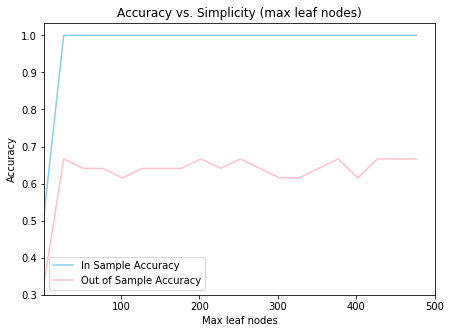

In [21]:
import matplotlib.pylab as plt
plt.figure(figsize=(7,5))
plt.plot(range(2,500,25), IS, color='skyblue', label='In Sample Accuracy')
plt.plot(range(2,500,25), OS, color='pink', label='Out of Sample Accuracy')
plt.xlabel("Max leaf nodes")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Simplicity (max leaf nodes)")
plt.legend()
plt.xlim(2,500)
plt.show()

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10 pts)

In [22]:
from sklearn.model_selection import GridSearchCV
# This time we'll use max_depth to control the complexity of the tree, 
# still using the same train/test split as above,
# and optimize the parameter value using GridSearchCV.
param_grid = {'max_depth':range(1,4)}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid,scoring='accuracy', cv=5, iid=False)
#out of sample accuracy
rs=gr.fit(X_train,y_train)
print (rs.best_params_, rs.best_score_)

{'max_depth': 3} 0.5121912624699003


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (5 pts)

In [23]:
from sklearn import tree
from IPython.display import Image
import pydotplus
dt=DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_split=3)
dt.fit(X_test,y_test)

thestring=tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=['low','medium','high','awful'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print (thestring) 

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="GDPPCptaIntDol <= 3914.0, samples = 39, value = [15, 8, 7, 9], class = low", fillcolor="#fae6d7"] ;
1 [label="SustAccImprSanRur <= 0.421, samples = 22, value = [15, 6, 0, 1], class = low", fillcolor="#f0b890"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="SustAccImprWatRur <= 0.861, samples = 17, value = [15, 2, 0, 0], class = low", fillcolor="#e89253"] ;
1 -> 2 ;
3 [label="samples = 16, value = [15, 1, 0, 0], class = low", fillcolor="#e78946"] ;
2 -> 3 ;
4 [label="samples = 1, value = [0, 1, 0, 0], class = medium", fillcolor="#47e539"] ;
2 -> 4 ;
5 [label="PCptaGovtExpHlthAvgExcRt <= 257.0, samples = 5, value = [0, 4, 0, 1], class = medium", fillcolor="#75ec6a"] ;
1 -> 5 ;
6 [label="samples = 4, value = [0, 4, 0, 0], class = medium", fillcolor="#47e539"] ;
5 -> 6 ;
7 [label="samples = 1, value = [0, 0, 0, 1], class = awful", fi

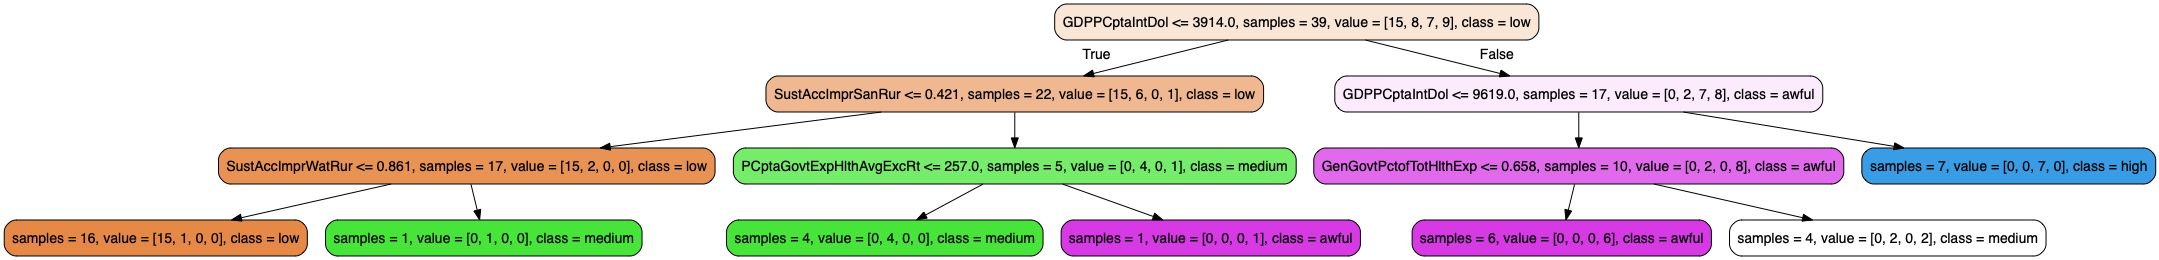

In [24]:
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())

### Question 4, Fit a random forest to the data from question 3 (20 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10 pts)

In [25]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators':range(1,51,5), 'max_depth':range(1,4)}
rf = RandomForestClassifier(n_jobs=-1, max_leaf_nodes=10)

gr=GridSearchCV(rf,param_grid=param_grid,scoring='accuracy', cv=5, iid=False)
rs=gr.fit(X_train,y_train)
print(rs.best_params_,rs.best_score_)

{'max_depth': 2, 'n_estimators': 21} 0.6816787065703475


b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

In the decision tree model, the best accuracy of the max_depth is about 0.51. However, in random forest model, the best accuracy is 0.69 when we use 41 trees to make prediction. The accuracy raise up a lot. For the interpretability, we can get the structure of single decision tree. But the interpretability of random forest model is worse. It's very hard for us to explain the stucture inside the random forest. Even though we have some ways to get some interpretability, it won't be as clear as decision tree model, especially for complex problems.